# This Notebook Explores the Application of Stochastic Gradient Descent to Linear Regression

### All Data was Pulled From This [Article](https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843#c551)


# Linear Regression (LR) Recap

* This notebook will explore applying a LR model for predicting the value of an output variable (y) given 2
   input variables (x1 & x2)

* Our predictor function is of the form $\hat{y} = b + x_1w_1 + x_2w_2$

* Our goal while performing this LR is to find optimal values for the parameter set ($b,w_1,w_2$) such that
our model has maximum accuracy

* We will perform Gradient Descent to find the optimal parameter set which maximizes our LR model accuracy

# Gradient Descent Setup

* To perform GD we must first have an expresion for the partial derivative of the MSE Loss Function: $Error(b,x_1,x_2)=\frac{1}{n}\sum\limits_{i=0}^{n}(y_i-\hat{y_i})^2$ for all our parameters
* The partial derivative of this loss function for the weights turns out to be: $\frac{\partial Error}{\partial w_n}=\frac{-2}{n}\sum\limits_{i=0}^{n}(y_i-\hat{y}_i)(x_n)$
* The partial derivative of this loss function for the bias turns out to be: $\frac{\partial Error}{\partial b}=\frac{-2}{n}\sum\limits_{i=0}^{n}(y_i-\hat{y}_i)$
* In GD fashion, we will update all parameters by the expression: $parameter_{next} = parameter_{current} - (LearningRate)(\frac{\partial Error}{\partial parameter_{current}})$

# Stochastic Gradient Descent Setup

* In Stochastic Gradient Descent, we dynamically update our parameters during each epoch. This entails taking the partial derivative of our loss function for each sample in our training data,
and then updating both our weights and bias terms. If we have 100 samples in our training data, we will update our parameter set 100 times each epoch. The Stochastic part of SGD lies in the fact we
shuffle our training data set each epoch iteration.

* When compared to vanilla Batch Gradient Descent (which updates our parameters once with a loss function partial derivative averaged over the entire training dataset),
Stochastic Gradient Descent is computationally less taxing (we do not need to hold an array of partial derivative values and then average the array to update our parameters).
Moreover, SGD reaches convergence much faster. The largest downside of SGD when compared to BGD is that SGD reaches the cost function minimum in a rather noisy fashion (we jump around more often).

In [1]:
#importing necessary modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading and plotting the data
df = pd.read_csv('SGD_LR_Data.csv')

print(df.head())

x1 = df['x1']
x2 = df['x2']
y = df['y']

#creating our training_data np array
train_data = np.array([[xval_1,xval_2,y_val] for xval_1, xval_2,y_val in zip(x1,x2,y)])

   x1  x2   y
0   4   1   2
1   2   8 -14
2   1   0   1
3   3   2  -1
4   1   4  -7


In [2]:
def prediction_func(x1_datapoint,x2_datapoint,weight_1,weight_2,bias):
    """
    returns our model prediction given x1/x2 datapoints and values for our weight/bias params
    """
    return bias + weight_1*x1_datapoint + weight_2*x2_datapoint

In [3]:
def partial_error_wrt_weight1(x1_datapoint,x2_datapoint,y_datapoint,weight_1,weight_2,bias):
    """
    returns our partial error derivative w.r.t weight 1 for a given training data sample
    """
    return -2*(y_datapoint - prediction_func(x1_datapoint,x2_datapoint,weight_1,weight_2,bias))*x1_datapoint

In [4]:
def partial_error_wrt_weight2(x1_datapoint,x2_datapoint,y_datapoint,weight_1,weight_2,bias):
    """
    returns our partial error derivative w.r.t weight 2 for a given training data sample
    """
    return -2*(y_datapoint - prediction_func(x1_datapoint,x2_datapoint,weight_1,weight_2,bias))*x2_datapoint

In [5]:
def partial_error_wrt_bias(x1_datapoint,x2_datapoint,y_datapoint,weight_1,weight_2,bias):
    """
    returns our partial error derivative w.r.t bias term for a given training data sample
    """
    return -2*(y_datapoint - prediction_func(x1_datapoint,x2_datapoint,weight_1,weight_2,bias))

In [6]:
def update_params(x1_datapoint,x2_datapoint,y_datapoint,weight_1,weight_2,bias):
    """
    returns our updated parameters. Called after we pull each training data sample
    """
    weight_1_new = weight_1 - learn_rate*partial_error_wrt_weight1(x1_datapoint,x2_datapoint,y_datapoint,weight_1,weight_2,bias)
    weight_2_new = weight_2 - learn_rate*partial_error_wrt_weight2(x1_datapoint,x2_datapoint,y_datapoint,weight_1,weight_2,bias)
    bias_new = bias - learn_rate*partial_error_wrt_bias(x1_datapoint,x2_datapoint,y_datapoint,weight_1,weight_2,bias)
    return weight_1_new,weight_2_new,bias_new

In [7]:
def error_func(training_data,weight_1,weight_2,bias):
    """
    This function returns our Mean Squared Error over our entire training dataset
    """
    return 1/len(training_data)*sum([(y_observation-prediction_func(x1_dp,x2_dp,weight_1,weight_2,bias))**2 for x1_dp,x2_dp,y_observation in training_data])

In [8]:
#performing the SGD

#hard coding a learn_rate & epoch #
learn_rate = 0.001
epochs = 2000

#randomly assigning weight values
w1, w2, b = np.random.randint(-10,10), np.random.randint(-10,10), 1

#init logs of variables of interest
w1_log = [0]*epochs
w2_log = [0]*epochs
b_log = [0]*epochs
partial_w1_log = [0]*epochs
partial_w2_log = [0]*epochs
partial_b_log = [0]*epochs
error_log = [0]*epochs

for epoch in range(epochs):
    #randomly shuffling the training data
    np.random.shuffle(train_data)
    #iterating over each sample in training data and updating params
    for sample in train_data:
        x1_obs , x2_obs , y_obs = sample
        #finding partials for current train data sample
        w1_partial = partial_error_wrt_weight1(x1_obs,x2_obs,y_obs,w1,w2,b)
        w2_partial = partial_error_wrt_weight2(x1_obs,x2_obs,y_obs,w1,w2,b)
        b_partial = partial_error_wrt_bias(x1_obs,x2_obs,y_obs,w1,w2,b)
        #logging our partial values
        partial_w1_log[epoch] = w1_partial
        partial_w2_log[epoch] = w2_partial
        partial_b_log[epoch] = b_partial
        #updating our parameters and logging
        w1, w2, b = update_params(x1_obs,x2_obs,y_obs,w1,w2,b)
        w1_log[epoch] = w1
        w2_log[epoch] = w2
        b_log[epoch] = b
    #calculating & logging our overall MSE after each training epoch
    curr_error = error_func(train_data,w1,w2,b)
    error_log[epoch] = curr_error

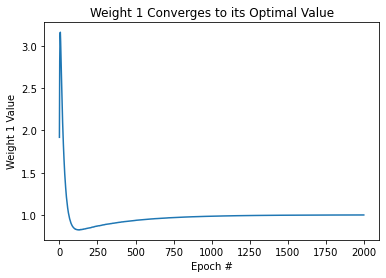

In [9]:
#plotting weight 1 value vs # of epochs

plt.plot(np.arange(epochs),w1_log)
plt.xlabel('Epoch #')
plt.ylabel('Weight 1 Value')
plt.title('Weight 1 Converges to its Optimal Value')
plt.show()

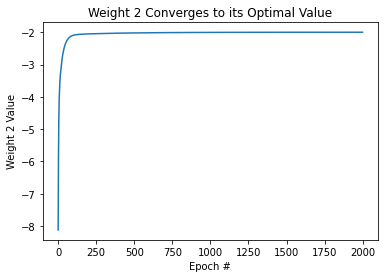

In [10]:
#plotting weight 2 value vs # of epochs

plt.plot(np.arange(epochs),w2_log)
plt.xlabel('Epoch #')
plt.ylabel('Weight 2 Value')
plt.title('Weight 2 Converges to its Optimal Value')
plt.show()

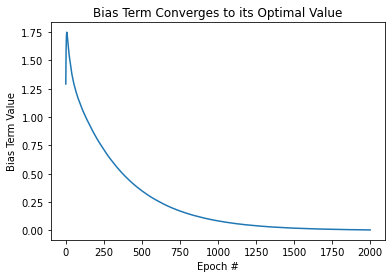

In [11]:
#plotting bias term value vs # of epochs

plt.plot(np.arange(epochs),b_log)
plt.xlabel('Epoch #')
plt.ylabel('Bias Term Value')
plt.title('Bias Term Converges to its Optimal Value')
plt.show()

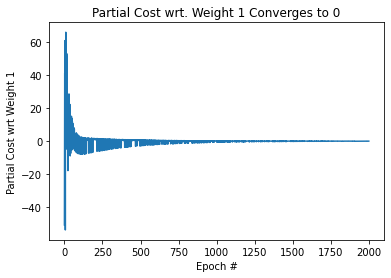

In [12]:
#plotting Partial Derivative of Cost wrt Weight 1 vs # of epochs

plt.plot(np.arange(epochs),partial_w1_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Weight 1')
plt.title('Partial Cost wrt. Weight 1 Converges to 0')
plt.show()

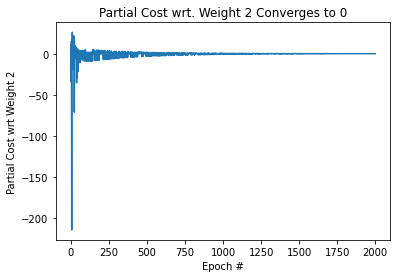

In [13]:
#plotting Partial Derivative of Cost wrt Weight 2 vs # of epochs

plt.plot(np.arange(epochs),partial_w2_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Weight 2')
plt.title('Partial Cost wrt. Weight 2 Converges to 0')
plt.show()

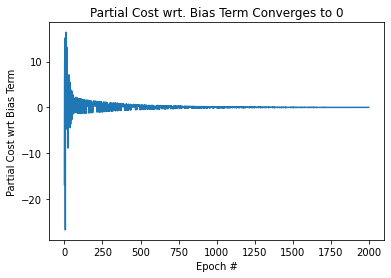

In [14]:
#plotting Partial Derivative of Cost wrt Bias Term vs # of epochs

plt.plot(np.arange(epochs),partial_b_log)
plt.xlabel('Epoch #')
plt.ylabel('Partial Cost wrt Bias Term')
plt.title('Partial Cost wrt. Bias Term Converges to 0')
plt.show()

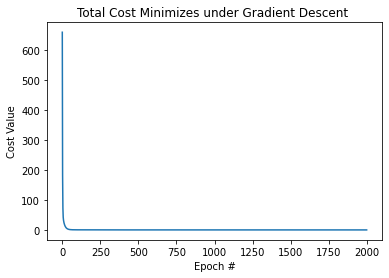

In [15]:
#plotting Cost vs # of epochs

plt.plot(np.arange(epochs),error_log)
plt.xlabel('Epoch #')
plt.ylabel('Cost Value')
plt.title('Total Cost Minimizes under Gradient Descent ')
plt.show()

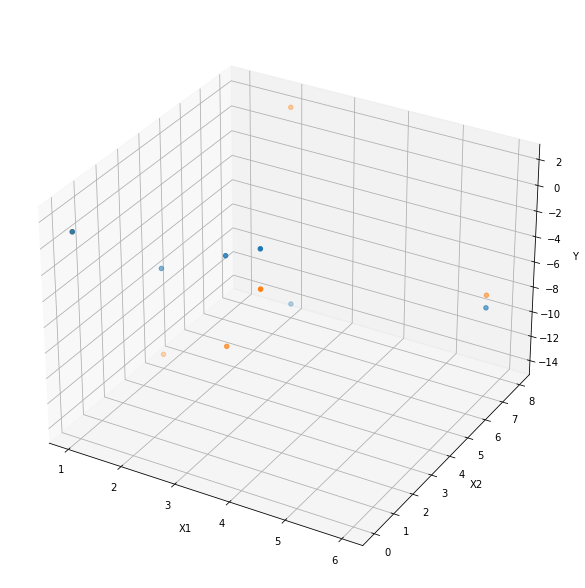

Optimal Weight 1 Value 0.9990812392980802 | Optimal Weight 2 Value -2.000313855999287 | Optimal Bias Term Value 0.0049133311810505105
Optimized Model Root Mean Squared Error 0.0024080081699829462


In [16]:
#plotting Our Optimized Predictor Function using input x/y data
w1_opt = w1_log[-1]
w2_opt = w2_log[-1]
b_opt = b_log[-1]

#creating our y prediction array over all input variables in the training data
y_predicts = [prediction_func(x1_dp,x2_dp,w1_opt,w2_opt,b_opt) for x1_dp,x2_dp,_ in train_data]

#scatter plotting the actual data vs our predictions
fig = plt.figure(figsize=(10,15))
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, y, 'gray')
ax.scatter(x1,x2,y_predicts,'red')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title('Scatterplot of multivariate LR Predictions vs Training Data', color='white')
plt.show()

#printing optimal parameter values and RMSE metric

print(f'Optimal Weight 1 Value {w1_opt} | Optimal Weight 2 Value {w2_opt} | Optimal Bias Term Value {b_opt}')
print(f'Optimized Model Root Mean Squared Error {(error_func(train_data,w1_opt,w2_opt,b_opt))**0.5}')

In [17]:
#comparing our model to the LR built in the SKL
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# create X and y
feature_cols = ['x1', 'x2']
X = df[feature_cols]
y = df.y

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(f'b: {lm2.intercept_}')

#printing coefficients in list form
print(list(zip(feature_cols, lm2.coef_)))

#calculating RMSE
y_true = [y_actual for _,_,y_actual in train_data]
print(np.sqrt(metrics.mean_squared_error(y_true, y_predicts)))

b: -8.881784197001252e-16
[('x1', 1.0000000000000002), ('x2', -2.0)]
0.0024080081699829462
